## To identify the Terrorist Organization based on the Terrorism Incident Info.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
SEED = 42
np.random.seed(SEED)

### Loading the Data
Loading Global Terrorism Dataset from CSV file

In [15]:
# Load the dataset
df_bl = pd.read_csv("baseline_data.csv")

### Step 1: Data Preparation

#### Pick relevant features

In [16]:
#pick features for Baseline Model
baseline_features = ['latitude','longitude','success','suicide','attacktype1','targtype1','claimed','nkill','nkillus','nkillter','nwound','nwoundus','ishostkid']

In [17]:
df_bl[baseline_features].head(10)

,latitude,longitude,success,suicide,attacktype1,targtype1,claimed,nkill,nkillus,nkillter,nwound,nwoundus,ishostkid
0,6.941837,79.861687,1,1,3,4,0,9,0,1,15,0,0
1,6.941837,79.861687,1,1,3,19,0,37,0,1,260,0,0
2,7.775413,81.606247,1,0,3,14,0,6,0,0,30,0,0
3,8.577826,81.218719,1,0,3,3,0,3,0,0,5,0,0
4,9.666399,80.020477,1,0,1,2,1,2,0,0,0,0,0
5,6.941837,79.861687,0,0,3,7,0,0,0,0,0,0,0
6,8.964041,80.787941,1,0,2,14,0,11,0,0,6,0,0
7,8.665596,80.296238,1,0,3,16,0,0,0,0,0,0,0
8,8.973818,80.527176,1,0,3,3,0,1,0,0,3,0,0
9,8.577826,81.218719,1,1,3,11,0,2,0,2,0,0,0


In [18]:
df_bl[baseline_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitude     12295 non-null  float64
 1   longitude    12295 non-null  float64
 2   success      12295 non-null  int64  
 3   suicide      12295 non-null  int64  
 4   attacktype1  12295 non-null  int64  
 5   targtype1    12295 non-null  int64  
 6   claimed      12295 non-null  int64  
 7   nkill        12295 non-null  int64  
 8   nkillus      12295 non-null  int64  
 9   nkillter     12295 non-null  int64  
 10  nwound       12295 non-null  int64  
 11  nwoundus     12295 non-null  int64  
 12  ishostkid    12295 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.2 MB


#### Map Labels

In [19]:
# Update gname(Terrorist Organization) column to numerical
df_bl['gname'] = df_bl['gname'].map({'Islamic State of Iraq and the Levant (ISIL)':0,'Taliban':1,'Taliban (Pakistan)':1,'Boko Haram':2,'Al-Qaida':3,'Al-Qaida in Iraq':3,'Al-Qaida in Saudi Arabia':3,'Al-Qaida in the Arabian Peninsula (AQAP)':3,'Al-Qaida in the Islamic Maghreb (AQIM)':3,'Al-Qaida in Yemen':3,'Al-Qaida Kurdish Battalions (AQKB)':3,'Al-Shabaab':4,'Tehrik-i-Taliban Pakistan (TTP)':5,'Al-Nusrah Front':6,'Fulani extremists':7,'Houthi extremists (Ansar Allah)':8,'Liberation Tigers of Tamil Eelam (LTTE)':9, 'Sympathizers of Al-Qaida Organization':3,'Islambouli Brigades of al-Qaida':3, 'Al-Qaida Organization for Jihad in Sweden':3,'Jadid Al-Qaida Bangladesh (JAQB)':3,'':0})

#### Check NA

In [20]:
#check for null cells
print(df_bl[baseline_features].isna().any().any())
df_bl[baseline_features].isna().any()

False


latitude       False
longitude      False
success        False
suicide        False
attacktype1    False
targtype1      False
claimed        False
nkill          False
nkillus        False
nkillter       False
nwound         False
nwoundus       False
ishostkid      False
dtype: bool

#### One-Hot Encoding for feature attacktype1,targtype1

In [22]:
df_bl_one_hot = df_bl[baseline_features]

In [23]:
#one hot encoding for feature attacktype1,targtype1
df_bl_one_hot = pd.get_dummies(df_bl_one_hot, columns = ['attacktype1','targtype1'])

In [24]:
df_bl_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12295 entries, 0 to 12294
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       12295 non-null  float64
 1   longitude      12295 non-null  float64
 2   success        12295 non-null  int64  
 3   suicide        12295 non-null  int64  
 4   claimed        12295 non-null  int64  
 5   nkill          12295 non-null  int64  
 6   nkillus        12295 non-null  int64  
 7   nkillter       12295 non-null  int64  
 8   nwound         12295 non-null  int64  
 9   nwoundus       12295 non-null  int64  
 10  ishostkid      12295 non-null  int64  
 11  attacktype1_1  12295 non-null  uint8  
 12  attacktype1_2  12295 non-null  uint8  
 13  attacktype1_3  12295 non-null  uint8  
 14  attacktype1_4  12295 non-null  uint8  
 15  attacktype1_5  12295 non-null  uint8  
 16  attacktype1_6  12295 non-null  uint8  
 17  attacktype1_7  12295 non-null  uint8  
 18  attack

In [25]:
df_bl_one_hot

,latitude,longitude,success,suicide,claimed,nkill,nkillus,nkillter,nwound,nwoundus,...,targtype1_12,targtype1_13,targtype1_14,targtype1_15,targtype1_16,targtype1_17,targtype1_18,targtype1_19,targtype1_21,targtype1_22
0,6.941837,79.861687,1,1,0,9,0,1,15,0,...,0,0,0,0,0,0,0,0,0,0
1,6.941837,79.861687,1,1,0,37,0,1,260,0,...,0,0,0,0,0,0,0,1,0,0
2,7.775413,81.606247,1,0,0,6,0,0,30,0,...,0,0,1,0,0,0,0,0,0,0
3,8.577826,81.218719,1,0,0,3,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,9.666399,80.020477,1,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12290,33.816111,44.783524,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,34.031331,44.070106,1,0,0,4,0,0,9,0,...,0,0,1,0,0,0,0,0,0,0
12292,2.059819,45.326115,1,0,1,2,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
12293,34.217806,69.109316,1,0,1,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Get an overall sense of the data shape with the mean/median, min, max, q1, q3 values
with pd.option_context('display.max_columns', 40):
    print(df_bl_one_hot.describe(include='all'))

           latitude     longitude       success       suicide       claimed  \
count  12295.000000  12295.000000  12295.000000  12295.000000  12295.000000   
mean      27.041715     50.535907      0.911427      0.147377      0.454006   
std       11.840124     18.383845      0.284137      0.354496      0.720256   
min      -33.934491    -83.047924      0.000000      0.000000     -9.000000   
25%       14.873924     43.295662      1.000000      0.000000      0.000000   
50%       33.303566     45.202400      1.000000      0.000000      0.000000   
75%       34.749010     67.115700      1.000000      0.000000      1.000000   
max       59.402479    151.179691      1.000000      1.000000      1.000000   

              nkill       nkillus      nkillter        nwound      nwoundus  \
count  12295.000000  12295.000000  12295.000000  12295.000000  12295.000000   
mean       4.550712      0.010492      1.056852      5.927206      0.007239   
std       13.548154      0.374436      3.988792    

In [27]:
df_bl_one_hot.describe(include='all')

,latitude,longitude,success,suicide,claimed,nkill,nkillus,nkillter,nwound,nwoundus,...,targtype1_12,targtype1_13,targtype1_14,targtype1_15,targtype1_16,targtype1_17,targtype1_18,targtype1_19,targtype1_21,targtype1_22
count,12295.000000,12295.000000,12295.000000,12295.000000,12295.000000,12295.000000,12295.000000,12295.000000,12295.000000,12295.000000,...,12295.000000,12295.000000,12295.000000,12295.000000,12295.000000,12295.000000,12295.000000,12295.000000,12295.000000,12295.000000
mean,27.041715,50.535907,0.911427,0.147377,0.454006,4.550712,0.010492,1.056852,5.927206,0.007239,...,0.006507,0.001139,0.365352,0.026678,0.004636,0.032046,0.000813,0.016592,0.009516,0.004636
std,11.840124,18.383845,0.284137,0.354496,0.720256,13.548154,0.374436,3.988792,21.602194,0.192666,...,0.080405,0.033726,0.481548,0.161146,0.067933,0.176128,0.028509,0.127742,0.097089,0.067933
min,-33.934491,-83.047924,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.873924,43.295662,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.303566,45.202400,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34.749010,67.115700,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000,5.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,59.402479,151.179691,1.000000,1.000000,1.000000,670.000000,38.000000,140.000000,1500.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# limit to categorical data using df.select_dtypes()
df_bl_cat = df_bl_one_hot.select_dtypes(include=['object'])
df_bl_cat.nunique()

Series([], dtype: float64)

In [29]:
# limit to numerical data using df.select_dtypes()
df_bl_num = df_bl_one_hot.select_dtypes(include=['number'])
df_bl_num.nunique()

latitude         5064
longitude        4992
success             2
suicide             2
claimed             3
nkill             105
nkillus             9
nkillter           55
nwound            141
nwoundus            9
ishostkid           3
attacktype1_1       2
attacktype1_2       2
attacktype1_3       2
attacktype1_4       2
attacktype1_5       2
attacktype1_6       2
attacktype1_7       2
attacktype1_8       2
attacktype1_9       2
targtype1_1         2
targtype1_2         2
targtype1_3         2
targtype1_4         2
targtype1_6         2
targtype1_7         2
targtype1_8         2
targtype1_9         2
targtype1_10        2
targtype1_11        2
targtype1_12        2
targtype1_13        2
targtype1_14        2
targtype1_15        2
targtype1_16        2
targtype1_17        2
targtype1_18        2
targtype1_19        2
targtype1_21        2
targtype1_22        2
dtype: int64

In [30]:
# look at correlations in the numerical independent variables, as well as the dependent variable
df_bl_one_hot.corr()

,latitude,longitude,success,suicide,claimed,nkill,nkillus,nkillter,nwound,nwoundus,...,targtype1_12,targtype1_13,targtype1_14,targtype1_15,targtype1_16,targtype1_17,targtype1_18,targtype1_19,targtype1_21,targtype1_22
latitude,1.000000,0.435624,-0.013927,0.020821,0.145933,0.030659,0.015885,0.084096,0.034027,0.025058,...,-0.012734,-0.002274,-0.044990,-0.033906,-0.048837,0.026428,-0.010065,-0.009484,0.021307,-0.007374
longitude,0.435624,1.000000,-0.031799,-0.099556,0.114749,-0.045185,-0.050727,0.067015,-0.041815,-0.011400,...,0.026586,0.013595,-0.245206,-0.072265,-0.046331,-0.019952,-0.033453,-0.029904,-0.017145,0.011636
success,-0.013927,-0.031799,1.000000,-0.026250,0.033550,0.037415,0.007971,-0.113904,0.059829,0.008741,...,0.018107,0.010525,0.033807,0.032069,0.000205,-0.003417,0.008894,0.011359,-0.001878,-0.004009
suicide,0.020821,-0.099556,-0.026250,1.000000,0.131679,0.181338,0.039825,0.109871,0.250429,0.060599,...,-0.016524,0.006373,-0.118178,0.042233,-0.028374,0.029877,0.004235,-0.001913,-0.028935,-0.001353
claimed,0.145933,0.114749,0.033550,0.131679,1.000000,0.036209,0.017322,0.026717,0.063970,0.023208,...,-0.056632,0.008853,-0.145964,-0.037783,0.011839,0.017390,0.009745,-0.019995,-0.016423,0.011839
nkill,0.030659,-0.045185,0.037415,0.181338,0.036209,1.000000,0.061443,0.304792,0.345759,0.017980,...,-0.018970,-0.005467,0.019589,0.003181,-0.020892,-0.004124,-0.001581,-0.004058,-0.021979,-0.007812
nkillus,0.015885,-0.050727,0.007971,0.039825,0.017322,0.061443,1.000000,0.006463,0.019865,0.455593,...,0.016645,-0.000946,-0.000510,-0.003291,-0.001912,-0.005099,-0.000799,-0.003640,-0.002747,-0.001912
nkillter,0.084096,0.067015,-0.113904,0.109871,0.026717,0.304792,0.006463,1.000000,0.095686,0.004227,...,-0.017385,-0.005318,-0.038340,-0.027542,-0.018083,-0.008035,-0.003268,-0.022604,-0.004128,-0.014481
nwound,0.034027,-0.041815,0.059829,0.250429,0.063970,0.345759,0.019865,0.095686,1.000000,0.032354,...,-0.019771,-0.004240,0.013684,0.025303,-0.018560,-0.015399,-0.002281,0.042206,-0.022552,0.009597
nwoundus,0.025058,-0.011400,0.008741,0.060599,0.023208,0.017980,0.455593,0.004227,0.032354,1.000000,...,0.002210,-0.001269,-0.022371,-0.006220,-0.002564,-0.006836,-0.001072,-0.001575,-0.003683,-0.002564


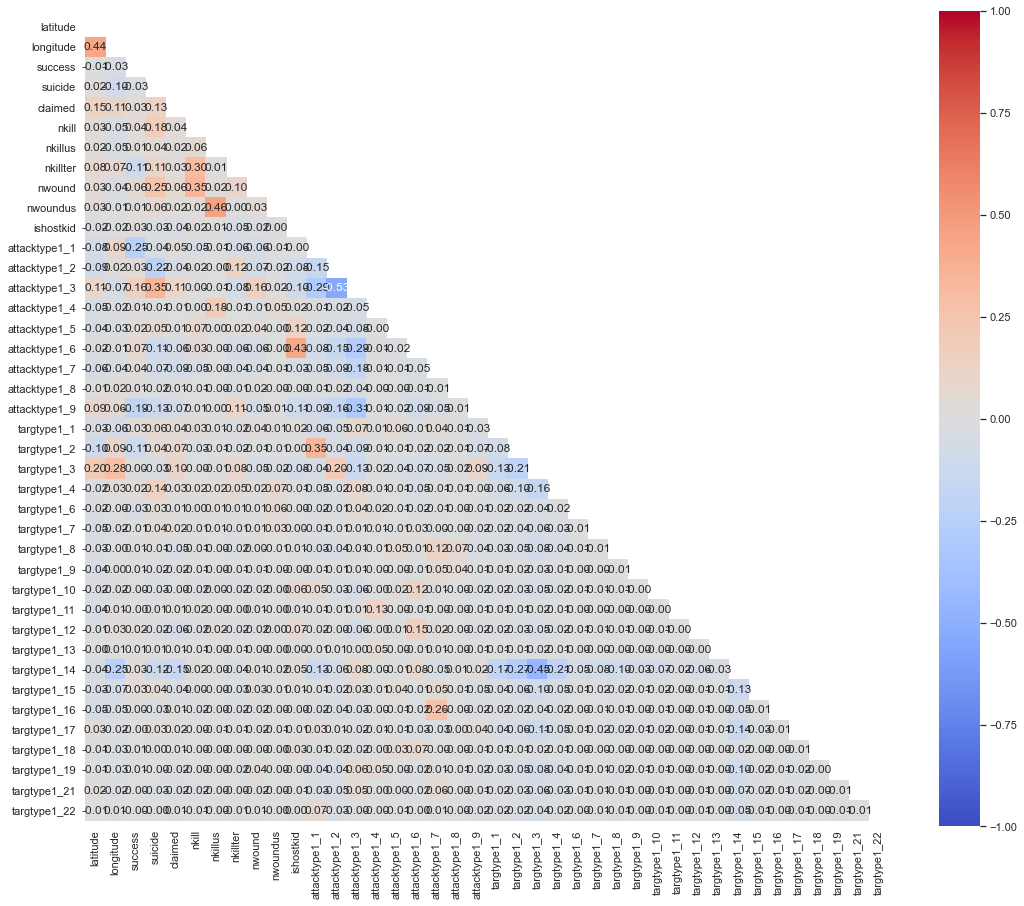

In [31]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df_bl_one_hot.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(18,15))

# Plot the heatmap
_ = sns.heatmap(df_bl_one_hot.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')  # annot=True display corr label

# _ = sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12}, square=True, 
#                 cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')

# Prevent Heatmap Cut-Off Issue
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom+0.5, top-0.5)

### Step 2: Preparing the data for training and testing

1) Divide our independent and dependent variable into two separate variables.

2) Split the data into training and testing datasets.

In [32]:
# 1)

X = df_bl_one_hot # input
y = df_bl['gname'] # output (dependent variable)

In [33]:
# 2) Splitting our data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X ,y, 
                                                    test_size = 0.2, 
                                                    shuffle=True, 
                                                    stratify=y,
                                                    random_state=SEED)
# make sure stratify the y values!

#### Normalize the Data

Since sklearn‘s Logistic Regression implementation uses Regularization, we need to scale our feature data. Create a StandardScaler object, .fit_transform() it on the training features, and .transform() the test features.

In [34]:
from sklearn.preprocessing import StandardScaler
# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
df_bl_one_hot.columns

Index(['latitude', 'longitude', 'success', 'suicide', 'claimed', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'ishostkid',
       'attacktype1_1', 'attacktype1_2', 'attacktype1_3', 'attacktype1_4',
       'attacktype1_5', 'attacktype1_6', 'attacktype1_7', 'attacktype1_8',
       'attacktype1_9', 'targtype1_1', 'targtype1_2', 'targtype1_3',
       'targtype1_4', 'targtype1_6', 'targtype1_7', 'targtype1_8',
       'targtype1_9', 'targtype1_10', 'targtype1_11', 'targtype1_12',
       'targtype1_13', 'targtype1_14', 'targtype1_15', 'targtype1_16',
       'targtype1_17', 'targtype1_18', 'targtype1_19', 'targtype1_21',
       'targtype1_22'],
      dtype='object')

In [36]:
pd.DataFrame(X_train, columns=df_bl_one_hot.columns) 

,latitude,longitude,success,suicide,claimed,nkill,nkillus,nkillter,nwound,nwoundus,...,targtype1_12,targtype1_13,targtype1_14,targtype1_15,targtype1_16,targtype1_17,targtype1_18,targtype1_19,targtype1_21,targtype1_22
0,-1.292757,-2.110891,0.306566,2.397129,0.753011,-0.040611,-0.027448,-0.007456,-0.263144,-0.036331,...,-0.081562,-0.03495,-0.757137,-0.167683,-0.070028,-0.184265,-0.028531,-0.13222,-0.0998,-0.063094
1,-1.366727,-2.062919,0.306566,-0.417166,-0.630369,-0.181486,-0.027448,-0.007456,-0.219787,-0.036331,...,-0.081562,-0.03495,-0.757137,5.963645,-0.070028,-0.184265,-0.028531,-0.13222,-0.0998,-0.063094
2,0.561959,0.989279,0.306566,-0.417166,0.753011,0.029826,-0.027448,-0.257753,-0.263144,-0.036331,...,-0.081562,-0.03495,-0.757137,-0.167683,-0.070028,-0.184265,-0.028531,-0.13222,-0.0998,-0.063094
3,0.786619,-0.406429,0.306566,-0.417166,-0.630369,-0.322361,-0.027448,-0.257753,-0.263144,-0.036331,...,-0.081562,-0.03495,-0.757137,-0.167683,-0.070028,-0.184265,-0.028531,-0.13222,-0.0998,-0.063094
4,0.528861,-0.339274,0.306566,-0.417166,0.753011,-0.181486,-0.027448,-0.257753,0.040355,-0.036331,...,-0.081562,-0.03495,1.320765,-0.167683,-0.070028,-0.184265,-0.028531,-0.13222,-0.0998,-0.063094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,-0.979133,-0.287162,-3.261938,-0.417166,-0.630369,-0.322361,-0.027448,-0.257753,-0.263144,-0.036331,...,-0.081562,-0.03495,1.320765,-0.167683,-0.070028,-0.184265,-0.028531,-0.13222,-0.0998,-0.063094
9832,-2.111075,-0.287094,0.306566,-0.417166,0.753011,-0.251923,-0.027448,-0.257753,-0.219787,-0.036331,...,-0.081562,-0.03495,-0.757137,-0.167683,-0.070028,-0.184265,-0.028531,-0.13222,-0.0998,-0.063094
9833,1.088826,-0.973758,0.306566,2.397129,-0.630369,7.073564,-0.027448,0.242841,10.359309,-0.036331,...,-0.081562,-0.03495,1.320765,-0.167683,-0.070028,-0.184265,-0.028531,-0.13222,-0.0998,-0.063094
9834,-1.267908,-2.004723,0.306566,2.397129,-0.630369,-0.251923,-0.027448,-0.007456,-0.133073,-0.036331,...,-0.081562,-0.03495,1.320765,-0.167683,-0.070028,-0.184265,-0.028531,-0.13222,-0.0998,-0.063094


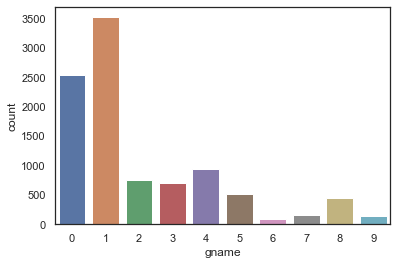

In [37]:
_ = sns.countplot(x=y_train)

### Step 3: Training the model

In [38]:
# Import the logistic regression algorithm

classifier = LogisticRegression(max_iter=5000)

# Train the model
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

### Step 4: Testing the model

In [39]:
# Kept aside some data to test - X_test
y_pred = classifier.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [40]:
compare_df[:10]

,Desired Output (Actuals),Predicted Output
1840,1,1
7889,1,1
899,5,2
11662,2,2
5456,0,0
1535,2,2
6292,1,1
10080,5,1
4660,2,2
6331,8,8


### Step 5: Evaluate the model

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, \
                            precision_score, recall_score

# Classification Report
print("Classification report:")
print()
print(classification_report(y_test, y_pred))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       637
           1       0.91      0.99      0.95       880
           2       0.90      0.99      0.95       188
           3       0.77      0.39      0.52       177
           4       1.00      0.98      0.99       236
           5       0.80      0.32      0.45       130
           6       0.00      0.00      0.00        24
           7       0.97      0.78      0.86        41
           8       0.80      0.91      0.85       113
           9       1.00      0.97      0.98        33

    accuracy                           0.89      2459
   macro avg       0.80      0.73      0.75      2459
weighted avg       0.88      0.89      0.87      2459




In [42]:
# Accuracy Score
test_acc = classifier.score(X_test, y_test)
print("Accuracy  = {:.2f}".format(test_acc))

# Precision
test_pre = precision_score(y_test, y_pred, average=None)
print("Precision = {}".format(test_pre))

# Recall
test_rec  = recall_score(y_test, y_pred, average=None)
print("Recall    = {}".format(test_rec))

Accuracy  = 0.89
Precision = [0.86490251 0.90673575 0.90338164 0.76666667 0.99570815 0.80392157
 0.         0.96969697 0.8046875  1.        ]
Recall    = [0.97488226 0.99431818 0.99468085 0.38983051 0.98305085 0.31538462
 0.         0.7804878  0.91150442 0.96969697]


In [43]:
# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[621,   2,   0,   9,   1,   4,   0,   0,   0,   0],
       [  0, 875,   0,   0,   0,   5,   0,   0,   0,   0],
       [  0,   0, 187,   0,   0,   0,   0,   1,   0,   0],
       [ 74,   1,  10,  69,   0,   0,   2,   0,  21,   0],
       [  0,   0,   0,   1, 232,   0,   0,   0,   3,   0],
       [  0,  87,   1,   0,   0,  41,   0,   0,   1,   0],
       [ 22,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   9,   0,   0,   0,   0,  32,   0,   0],
       [  1,   0,   0,   9,   0,   0,   0,   0, 103,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,  32]], dtype=int64)

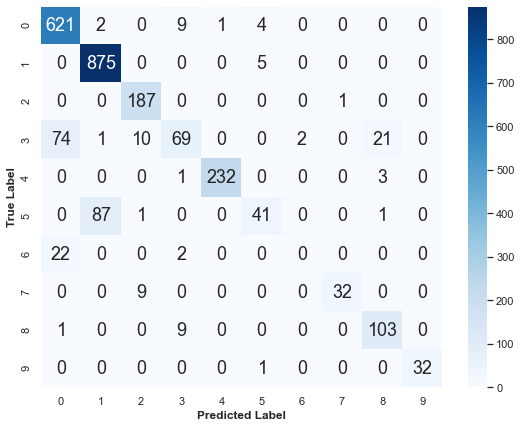

In [44]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, annot_kws={"size": 18},
                cmap=plt.cm.Blues,fmt='g')
#                 ),xticklabels=class_names, yticklabels=class_names
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

In [45]:
print(classifier.coef_)

[[ 4.39976175e+00 -5.29471039e-01 -6.44038641e-02  3.85755052e-01
  -2.38300770e-02  9.80017358e-02  3.53432603e-01  4.73345266e-01
  -1.02543522e-01  1.44358206e-01 -2.61199467e-01  2.71577976e-02
  -1.90122365e-01  3.12748992e-02  5.73703146e-02  1.14389186e-01
   1.95253648e-01 -1.32801597e-02 -1.15137697e-01  6.87940961e-05
   1.13842169e-01 -1.91126345e-01  4.14377224e-02  1.04042387e-01
   1.45064661e-01 -8.13368067e-02 -5.95930749e-02  1.89548298e-04
  -1.96716305e-02 -4.34870684e-02  7.17576515e-02  5.97781631e-02
  -6.15165089e-02  2.87044639e-02 -3.14966846e-01  1.72503285e-01
   7.72829511e-02 -8.08868773e-02  2.08590042e-01 -5.13428467e-02]
 [ 8.87831254e+00  6.34192727e+00  1.70116169e-01  3.15658419e-01
  -1.97938703e-02 -1.26483470e-01  2.33294993e-01  6.47686381e-01
  -3.00839860e-01  2.08299262e-01 -3.00248963e-01  1.90355253e-01
  -5.20394300e-02 -1.80868511e-01  9.41291856e-02  1.19839976e-01
   1.99469617e-01 -1.14355832e-01  9.89625748e-02  4.07070389e-02
   5.2453

In [46]:
coefficients = classifier.coef_.tolist()[0]
print(coefficients)

[4.399761753295311, -0.5294710387360744, -0.0644038640520273, 0.385755051735515, -0.02383007699845854, 0.0980017358292509, 0.3534326031851679, 0.47334526575990254, -0.10254352224267013, 0.14435820566174817, -0.26119946673969213, 0.027157797603507523, -0.19012236454622372, 0.03127489918980634, 0.0573703146013508, 0.11438918641626108, 0.1952536484500215, -0.013280159698469315, -0.115137696948014, 6.879409613525094e-05, 0.11384216933272984, -0.19112634506233814, 0.04143772239016268, 0.10404238675672957, 0.1450646610127544, -0.08133680666635316, -0.05959307488045857, 0.00018954829783794948, -0.01967163047310198, -0.0434870684480246, 0.07175765149041664, 0.05977816305216049, -0.061516508889837354, 0.02870446386846782, -0.3149668460362231, 0.17250328549402225, 0.0772829511199427, -0.08088687731275028, 0.20859004168903447, -0.05134284668493918]


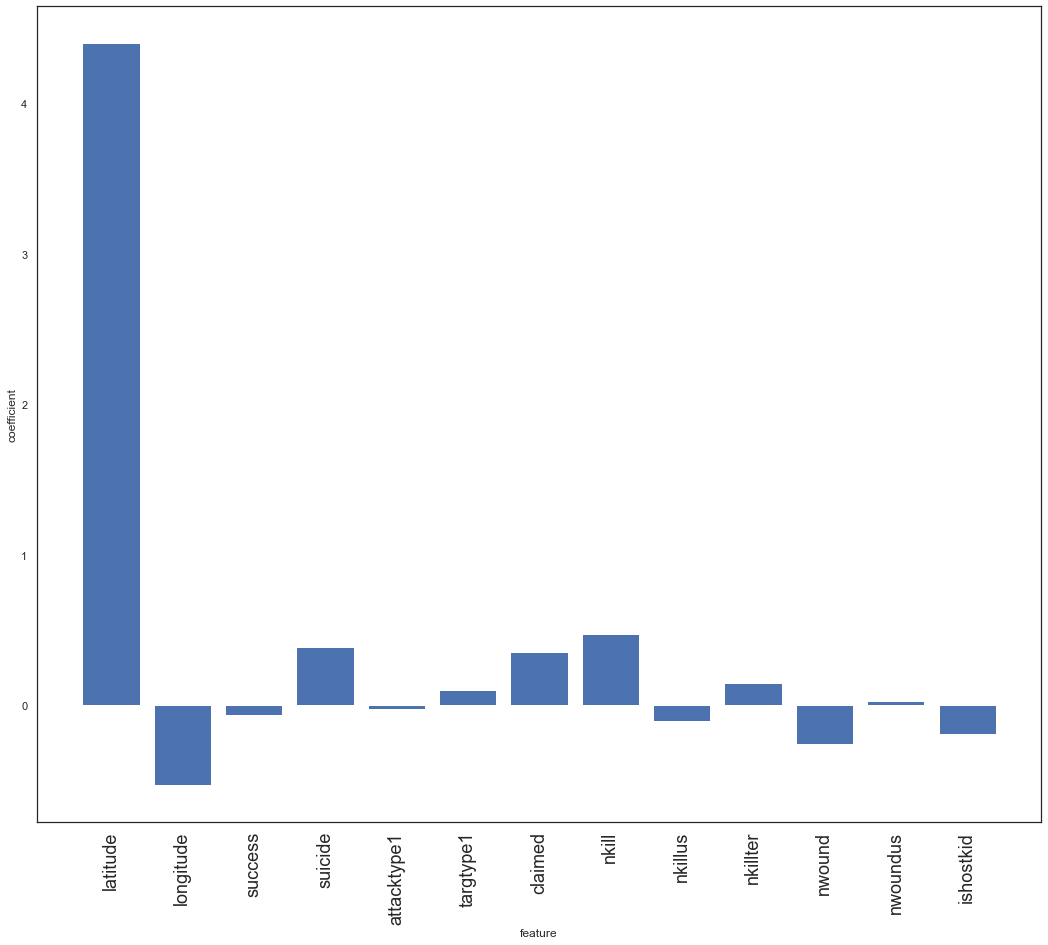

In [48]:
fig, ax = plt.subplots(figsize=(18,15))
plt.bar([0,1,2,3,4,5,6,7,8,9,10,11,12],coefficients[0:13])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],baseline_features,rotation=90,fontsize =18)
plt.xlabel('feature')
plt.ylabel('coefficient')
 
plt.show()

### Step 6: My own prediction using one of the observations from X_test

In [58]:
# Choose a random row from X_test
my_features = X_test[np.random.randint(0, len(X_test))]
own_pred = classifier.predict(my_features.reshape(1,-1))
print("My prediction is a {}.".format(own_pred[0]))
print("This was the input data:")
print(my_features)

My prediction is a 8.
This was the input data:
[-1.15177942 -0.37942036  0.30656626 -0.41716569 -0.63036897 -0.25192319
 -0.02744831 -0.25775336 -0.26314353 -0.03633115 -0.08047003 -0.28605975
 -0.52621773  0.98566596 -0.04513856 -0.07498765 -0.28501855 -0.1776736
 -0.04160934 -0.30517504 -0.22774132 -0.35539067 -0.58862128 -0.27187565
 -0.06548542 -0.10487157 -0.13301393 -0.04036493 -0.09280958 -0.0247058
 -0.08156187 -0.03494994  1.32076479 -0.1676827  -0.07002831 -0.18426486
 -0.0285307  -0.1322201  -0.09979957 -0.06309366]


In [59]:
# probabilities that led to these predictions
print(classifier.predict_proba(my_features.reshape(1,-1)))

[[4.72667792e-03 2.10116319e-08 1.79173249e-02 8.59048653e-02
  2.44368727e-02 1.88811567e-09 1.77121944e-03 7.10071902e-08
  8.64356099e-01 8.86847215e-04]]
